In [7]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForTokenClassification, BertConfig
from transformers import AdamW
import pandas as pd
import numpy as np

device = "cuda:0" if torch.cuda.is_available() else "cpu"

# Load the Excel file
file_path = r'/home2/hardik_2001cs27/utad/experiments/results.xlsx'  # Change this to your file's path
df = pd.read_excel(file_path)

# Extract a specific column (e.g., 'Name')
normal3 = 'Input Sentence'  # Change this to the column you want to extract
corrupted3 = 'Reconstructed Sentence'
maskin3 = 'Masking Pattern'
normal2 = df[normal3]
corrupted2 = df[corrupted3]
maskin2 = df[maskin3]

# Convert to a list or numpy array
normal = normal2.tolist()  # Convert to a list
corrupted = corrupted2.tolist()
maskin = maskin2.tolist()
masking_patterns = []
for m in maskin:
    mm=[]
    for ch in m:
        ch2 = int(ch)
        mm.append(ch2)
    masking_patterns.append(mm)

# Sample data
original_sentences = normal
corrupted_sentences = corrupted
labels = masking_patterns

In [8]:
# Create a custom dataset class
class TokenClassificationDataset(Dataset):
    def __init__(self, original_sentences, corrupted_sentences, labels, tokenizer):
        self.original_sentences = original_sentences
        self.corrupted_sentences = corrupted_sentences
        self.labels = labels
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.original_sentences)

    def __getitem__(self, idx):
        original_sentence = self.original_sentences[idx]
        label = self.labels[idx]
        
        # Tokenize original sentence and create input ids and attention masks
        encoding = self.tokenizer(
            original_sentence,
            max_length=100,
            truncation=True,
            padding='max_length',
            return_tensors='pt'
        )
        
        # Use the label to align with the tokenized sequence
        input_ids = encoding['input_ids'].squeeze(0)
        attention_mask = encoding['attention_mask'].squeeze(0)
        
        # Create a tensor of the same length as the tokenized input, with -100 where tokens should be ignored (padding, special tokens)
        label_tensor = torch.full(input_ids.shape, -100, dtype=torch.long)
        
        # Match labels with the original tokens, not including special tokens
        label_pos = [i for i, word in enumerate(self.tokenizer.tokenize(original_sentence))]
        for i, label_value in zip(label_pos, label):
            label_tensor[i] = label_value
        
        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': label
        }


Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 61/61 [00:34<00:00,  1.77it/s]


Epoch: 1 -> loss: 20.443126678466797


100%|██████████| 61/61 [00:34<00:00,  1.75it/s]


Epoch: 2 -> loss: 0.3124803304672241


100%|██████████| 61/61 [00:36<00:00,  1.69it/s]


Epoch: 3 -> loss: 0.1559646725654602


100%|██████████| 61/61 [00:36<00:00,  1.66it/s]


Epoch: 4 -> loss: 0.10361224412918091


100%|██████████| 61/61 [00:40<00:00,  1.52it/s]


Epoch: 5 -> loss: 0.07703448832035065


100%|██████████| 61/61 [00:33<00:00,  1.84it/s]


Epoch: 6 -> loss: 0.06095863878726959


100%|██████████| 61/61 [00:40<00:00,  1.50it/s]


Epoch: 7 -> loss: 0.049691472202539444


100%|██████████| 61/61 [00:44<00:00,  1.38it/s]


Epoch: 8 -> loss: 0.04130750894546509


100%|██████████| 61/61 [00:49<00:00,  1.24it/s]


Epoch: 9 -> loss: 0.03444332256913185


100%|██████████| 61/61 [05:16<00:00,  5.20s/it]


Epoch: 10 -> loss: 0.02897808887064457


100%|██████████| 61/61 [04:47<00:00,  4.71s/it]


Epoch: 11 -> loss: 0.024013755843043327


100%|██████████| 61/61 [04:48<00:00,  4.73s/it]


Epoch: 12 -> loss: 0.020111432299017906


100%|██████████| 61/61 [04:40<00:00,  4.60s/it]


Epoch: 13 -> loss: 0.016656015068292618


100%|██████████| 61/61 [04:49<00:00,  4.75s/it]


Epoch: 14 -> loss: 0.013728498481214046


100%|██████████| 61/61 [04:32<00:00,  4.48s/it]


Epoch: 15 -> loss: 0.011316068470478058


100%|██████████| 61/61 [01:33<00:00,  1.53s/it]


Epoch: 16 -> loss: 0.009452655911445618


100%|██████████| 61/61 [00:43<00:00,  1.39it/s]


Epoch: 17 -> loss: 0.00800332147628069


100%|██████████| 61/61 [00:44<00:00,  1.37it/s]


Epoch: 18 -> loss: 0.00700789550319314


100%|██████████| 61/61 [00:43<00:00,  1.39it/s]


Epoch: 19 -> loss: 0.00574282044544816


100%|██████████| 61/61 [00:45<00:00,  1.35it/s]


Epoch: 20 -> loss: 0.005006686318665743


100%|██████████| 61/61 [00:45<00:00,  1.33it/s]


Epoch: 21 -> loss: 0.004447572398930788


100%|██████████| 61/61 [01:26<00:00,  1.42s/it]


Epoch: 22 -> loss: 0.003970556426793337


100%|██████████| 61/61 [04:57<00:00,  4.88s/it]


Epoch: 23 -> loss: 0.003343525342643261


100%|██████████| 61/61 [05:13<00:00,  5.13s/it]


Epoch: 24 -> loss: 0.00296216132119298


100%|██████████| 61/61 [05:14<00:00,  5.16s/it]


Epoch: 25 -> loss: 0.002659867750480771


100%|██████████| 61/61 [05:12<00:00,  5.12s/it]


Epoch: 26 -> loss: 0.0024217560421675444


100%|██████████| 61/61 [05:08<00:00,  5.05s/it]


Epoch: 27 -> loss: 0.0020715126302093267


100%|██████████| 61/61 [04:51<00:00,  4.77s/it]


Epoch: 28 -> loss: 0.001981035340577364


100%|██████████| 61/61 [01:48<00:00,  1.79s/it]


Epoch: 29 -> loss: 0.001833288581110537


100%|██████████| 61/61 [00:41<00:00,  1.48it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 30 -> loss: 0.001715480349957943
Training complete.


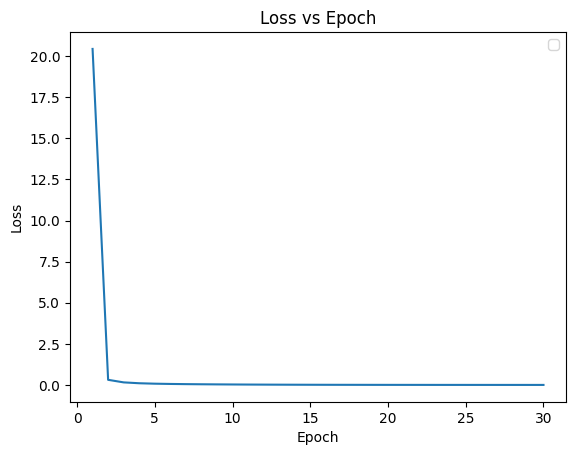

In [11]:
from tqdm import tqdm
import matplotlib.pyplot as plt

# Initialize tokenizer and dataset
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
dataset = TokenClassificationDataset(original_sentences, corrupted_sentences, labels, tokenizer)

# Create a data loader for batching
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# Initialize BERT for token classification with 2 classes (normal/corrupted)
num_labels = 2  # 0 or 1
config = BertConfig.from_pretrained('bert-base-uncased', num_labels=num_labels)
model = BertForTokenClassification.from_pretrained('bert-base-uncased', config=config)
for name, param in list(model.named_parameters())[:-39]: 
    param.requires_grad = False
# Example of training loop
optimizer = AdamW(model.parameters(), lr=5e-5)

# Simple training loop (just one step for demonstration)
model.train()
epochs = 30
loss_values=[]
for epoch in range(epochs):
    total_loss=0
    for batch in tqdm(dataloader):
        input_ids2 = batch['input_ids']
        attention_mask2 = batch['attention_mask']
        labels2 = batch['labels']
        labels3 = torch.stack(labels2, dim = 1)

        # Forward pass
        outputs = model(input_ids=input_ids2, attention_mask=attention_mask2, labels=labels3)
        predictions = torch.argmax(outputs.logits, dim=-1).squeeze().tolist()
        
        # Loss and backward pass
        loss = outputs.loss
        total_loss += loss
        loss.backward()
        
        # Update weights
        optimizer.step()
        optimizer.zero_grad()

    # Calculate average loss for the epoch
    average_loss = total_loss/(len(dataloader)*epoch+1)
    loss_values.append(average_loss)

    print("Epoch: {} -> loss: {}".format(epoch+1, average_loss))

print("Training complete.")

# Assuming loss_values is a list or numpy array of loss values
loss_values_cpu = [loss.cpu().detach().numpy() for loss in loss_values]

# Plot loss vs epoch curve
plt.plot(np.array(range(1, epochs+1)), np.array(loss_values_cpu))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.show()

In [10]:
# Example of inference using the trained model
model.eval()
def split_lines(text, n):
    words = text.split()
    lines = [' '.join(words[i:i+n]) for i in range(0, len(words), n)]
    return lines
# Test with new data
# open file
with open(r"/home2/hardik_2001cs27/utad/datasets/ag_od/test/business-outliers.txt",'r') as f:
    file22 = f.read()

# Split the paragraph into lines after every 100 words
file2 = split_lines(file22, 100)

for line in file2:
    encoding = tokenizer(line, truncation=True, padding='max_length', return_tensors='pt')

    # Predict if tokens are normal or corrupted
    outputs = model(input_ids=encoding['input_ids'], attention_mask=encoding['attention_mask'])
    # Applying softmax to obtain probabilities
    probabilities = F.softmax(outputs.logits, dim=-1)  # Normalize scores to get probabilities

    # Converting to a list of probabilities for each token
    prob_list = probabilities.squeeze().tolist()

    # Output tokenization and corresponding probabilities
    tokens = tokenizer.convert_ids_to_tokens(encoding['input_ids'].squeeze())
    
    # Get probabilities for a specific label (e.g., index 1 for 'corrupted')
    # Adjust the index based on your model's label mapping
    corrupted_probabilities = [p[1] for p in prob_list]  # Assuming 1 is 'corrupted'
    
    print("Tokens:", tokens)
    print("Corrupted Probabilities:", corrupted_probabilities)

    # anomaly score average of all the probabilites
    anomaly_score = sum(corrupted_probabilities)/len(corrupted_probabilities)
    print("Anomaly Score: ", anomaly_score)
    
    # auroc
    #put into excel

Tokens: ['[CLS]', 'race', 'second', 'private', 'team', 'sets', 'launch', 'date', 'human', 'space', '##flight', 'space', 'com', 'space', 'com', 'toronto', 'canada', 'second', 'team', 'rocket', '##eers', 'competing', 'million', 'an', '##sari', 'prize', 'contest', 'privately', 'funded', 'sub', '##or', '##bit', '##al', 'space', 'flight', 'officially', 'announced', 'first', 'launch', 'date', 'manned', 'rocket', 'company', 'wins', 'grant', 'study', 'peptide', '##s', 'company', 'founded', 'chemistry', 'researcher', 'university', 'louisville', 'grant', 'develop', 'method', 'producing', 'better', 'peptide', '##s', 'short', 'chains', 'amino', 'acids', 'building', 'blocks', 'proteins', 'prediction', 'unit', 'helps', 'forecast', 'wild', '##fires', 'barely', 'dawn', 'mike', 'fitzpatrick', 'starts', 'shift', 'blur', 'colorful', 'maps', 'figures', 'endless', 'charts', 'already', 'knows', 'day', 'bring', 'lightning', 'strike', 'places', 'expects', 'winds', 'pick', 'moist', 'places', 'dry', 'flames', '